In [1]:
import pandas as pd
import matplotlib.pyplot as plt

1. Import the "City_Air_Quality.csv" dataset.

In [5]:
data = pd.read_csv("AirQuality.csv")

2. Explore the dataset to understand its structure and content.

In [6]:
print(data.head()) 
print(data.info())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2   
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64  \
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

In [7]:
print(data.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [8]:
data.dropna(inplace=True)
cleaned_data = data.dropna()

In [9]:
print(cleaned_data)

                City        Date  PM2.5    PM10    NO    NO2    NOx    NH3   
2123       Amaravati  2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  \
2124       Amaravati  2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28   
2125       Amaravati  2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91   
2126       Amaravati  2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42   
2127       Amaravati  2017-11-29  72.47  114.84  5.23  23.20  16.59  12.25   
...              ...         ...    ...     ...   ...    ...    ...    ...   
29525  Visakhapatnam  2020-06-26   7.63   32.27  5.91  23.27  17.19  11.15   
29526  Visakhapatnam  2020-06-27  15.02   50.94  7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38   74.09  3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91   65.73  3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64   49.97  4.05  29.26  18.80  10.03   

         CO    SO2      O3  Benzene  Toluene  Xylene    AQI    

In [10]:
print(cleaned_data.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


4. Create line plots or time series plots to visualize the overall AQI trend over time.

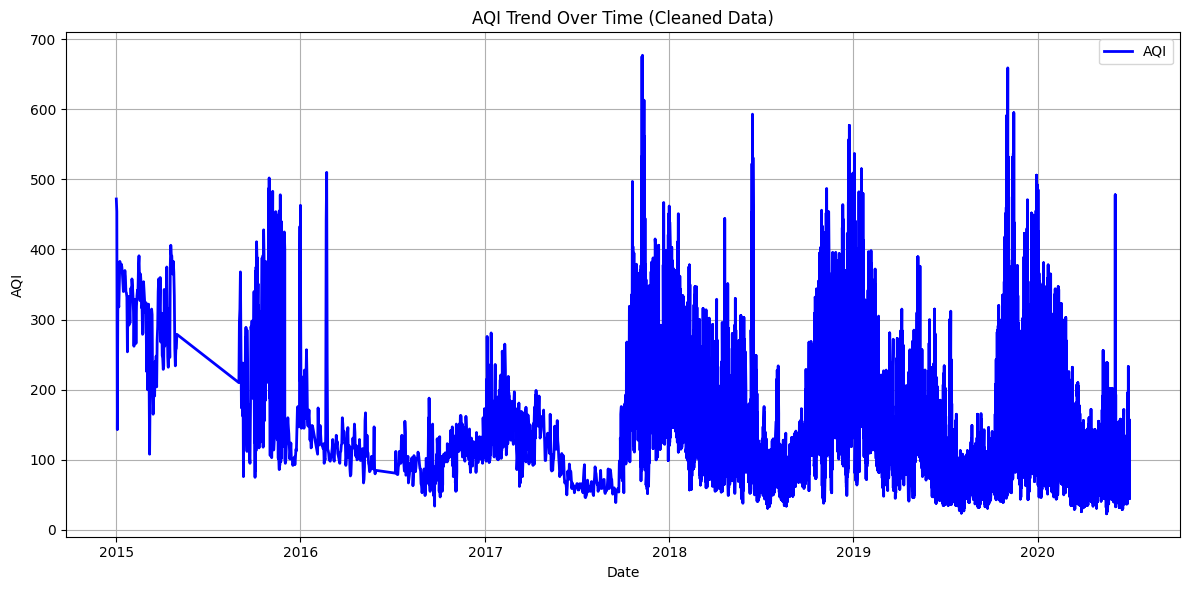

In [11]:
import matplotlib.pyplot as plt

# Convert the 'Date' column to a datetime format for proper time series plotting
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Sort the DataFrame by the 'Date' column (optional but recommended for time series)
cleaned_data.sort_values(by='Date', inplace=True)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Date'], cleaned_data['AQI'], label='AQI', color='blue', linewidth=2)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Trend Over Time (Cleaned Data)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

5. Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to
visualize their trends over time.

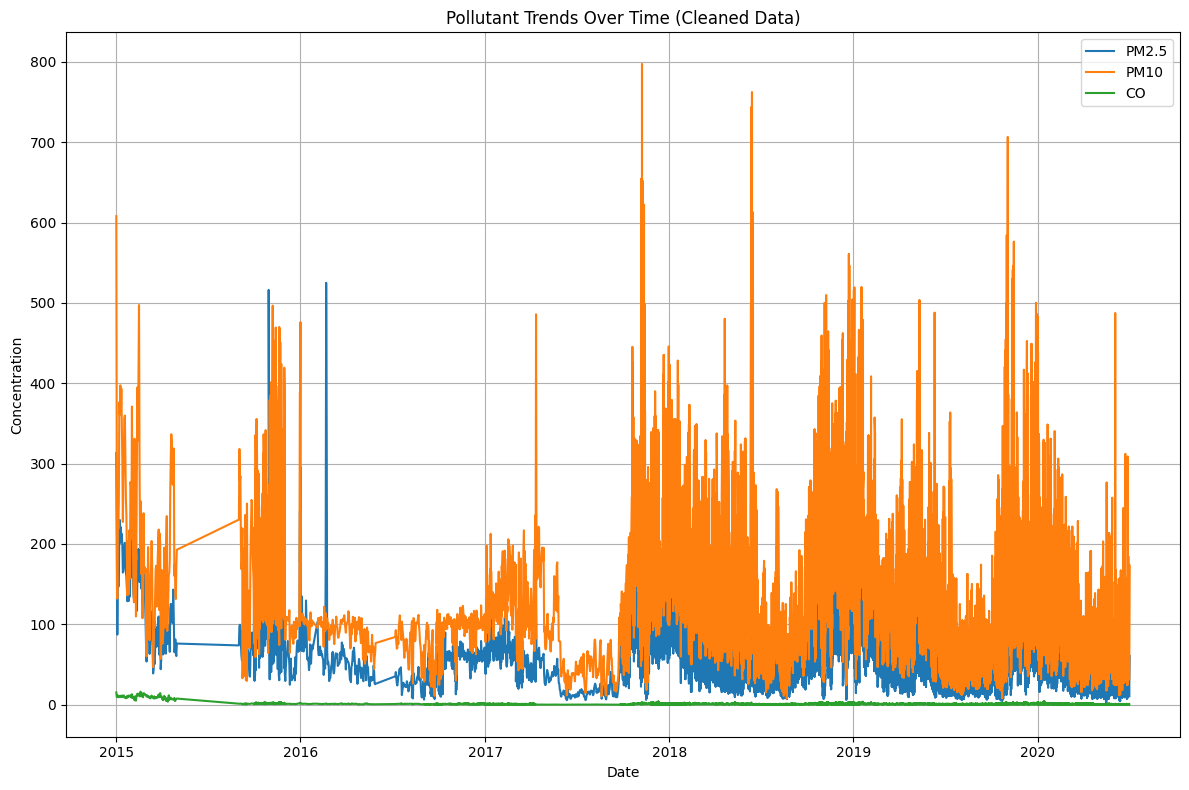

In [13]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Sort the DataFrame by the 'Date' column (optional but recommended for time series)
cleaned_data.sort_values(by='Date', inplace=True)

# Define the pollutants you want to plot
pollutants = ['PM2.5', 'PM10', 'CO']

# Create separate line plots for each pollutant
plt.figure(figsize=(12, 8))

for pollutant in pollutants:
    plt.plot(cleaned_data['Date'], cleaned_data[pollutant], label=pollutant)

plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Pollutant Trends Over Time (Cleaned Data)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plots
plt.show()

6. Use bar plots or stacked bar plots to compare the AQI values across different dates or
time periods.

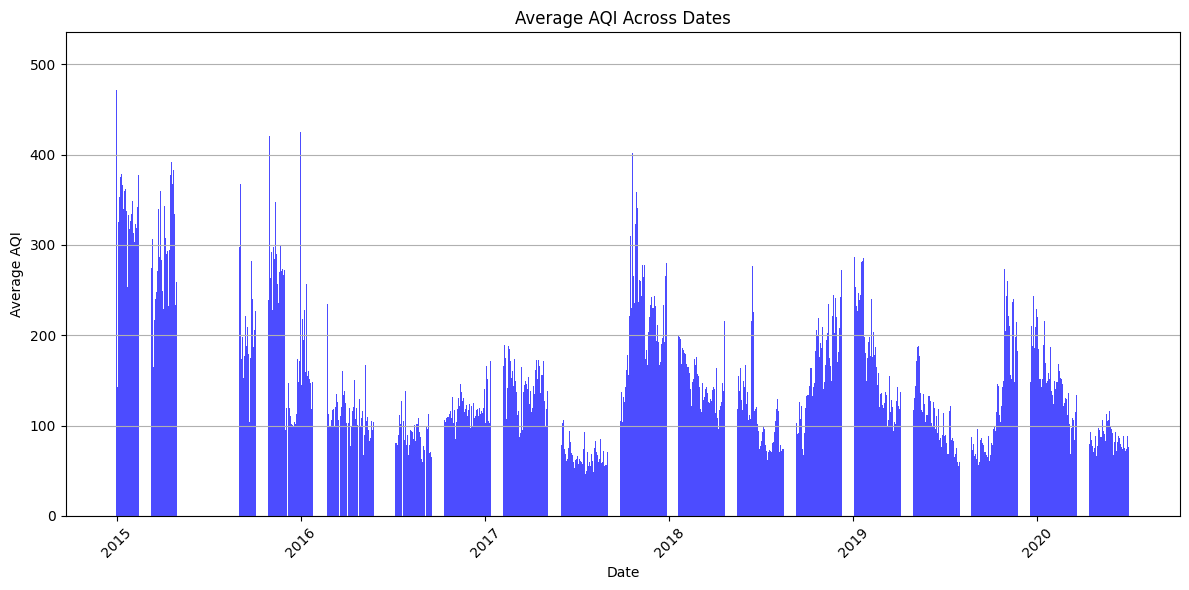

In [14]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

# Group the data by 'Date' and calculate the mean AQI for each date
aqi_by_date = cleaned_data.groupby('Date')['AQI'].mean().reset_index()

# Create a bar plot to compare AQI values across dates
plt.figure(figsize=(12, 6))
plt.bar(aqi_by_date['Date'], aqi_by_date['AQI'], color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Average AQI')
plt.title('Average AQI Across Dates')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

7.violin plots to analyze the distribution of AQI values for different
pollutant categories.

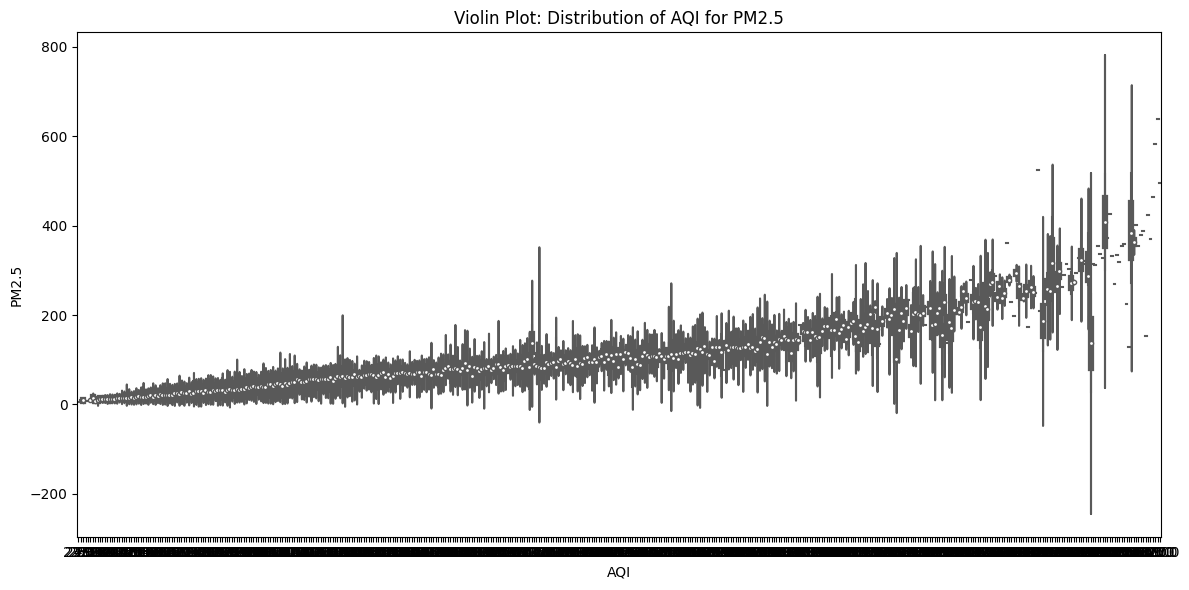

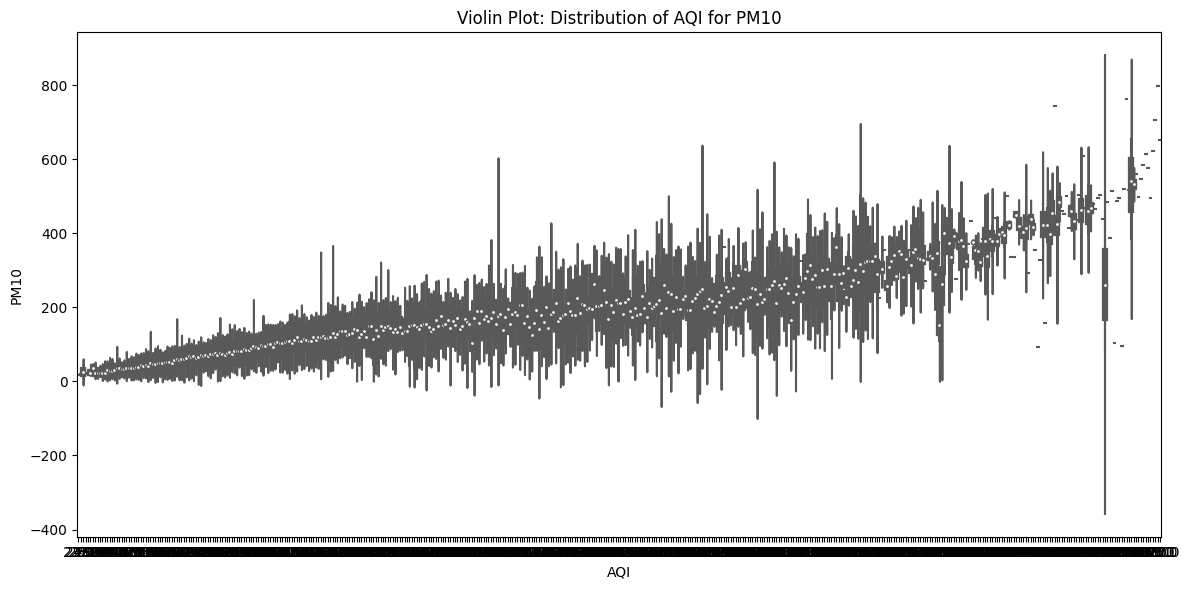

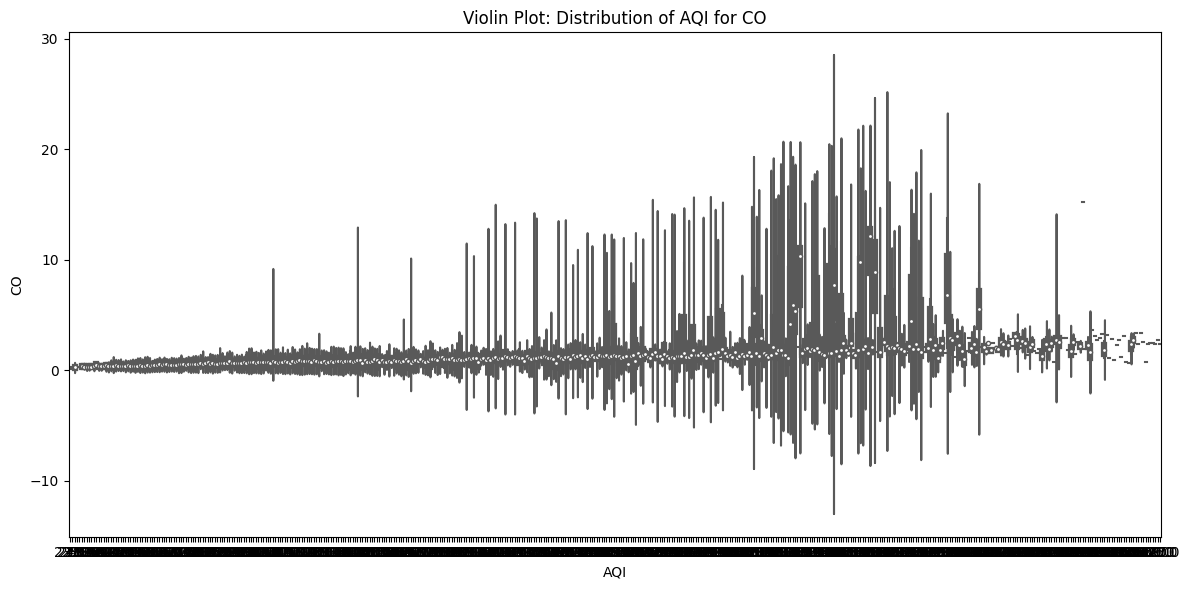

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

pollutants = ['PM2.5', 'PM10', 'CO']


# Create violin plots for the same analysis (if desired)
plt.figure(figsize=(12, 6))
sns.violinplot(data=cleaned_data, x='AQI', y='PM2.5', palette='Set2', color='red')
plt.xlabel('AQI')
plt.ylabel('PM2.5')
plt.title('Violin Plot: Distribution of AQI for PM2.5')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=cleaned_data, x='AQI', y='PM10', palette='Set2', color='red')
plt.xlabel('AQI')
plt.ylabel('PM10')
plt.title('Violin Plot: Distribution of AQI for PM10')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=cleaned_data, x='AQI', y='CO', palette='Set2', color='red')
plt.xlabel('AQI')
plt.ylabel('CO')
plt.title('Violin Plot: Distribution of AQI for CO')
plt.tight_layout()
plt.show()


8.bubble charts to explore the relationship between AQI values and
pollutant levels.

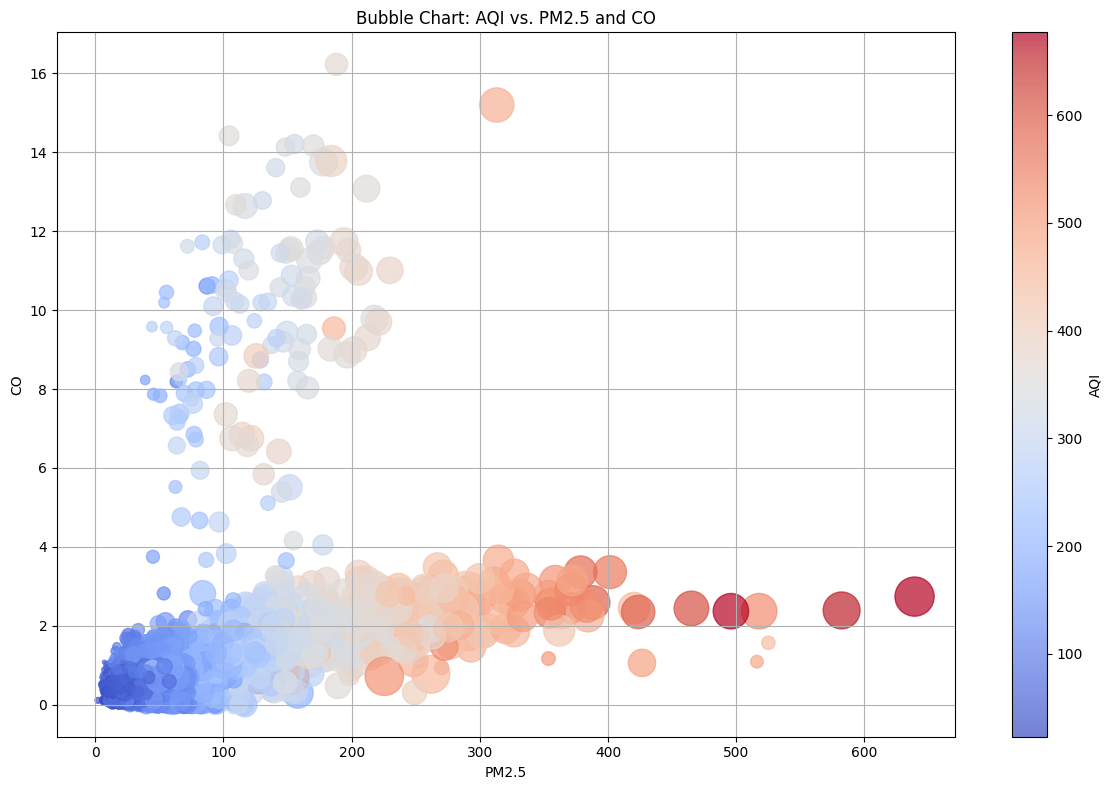

In [18]:
import matplotlib.pyplot as plt


# Define variables for the bubble chart
x = cleaned_data['PM2.5']
y = cleaned_data['CO']
bubble_size = cleaned_data['PM10']  # Represent 'PM10' using bubble size
aqi_values = cleaned_data['AQI']

# Create the bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(x, y, s=bubble_size, c=aqi_values, cmap='coolwarm', alpha=0.7)
plt.xlabel('PM2.5')
plt.ylabel('CO')
plt.title('Bubble Chart: AQI vs. PM2.5 and CO')
plt.colorbar(label='AQI')  # Add colorbar to show AQI values
plt.grid(True)
plt.tight_layout()
plt.show()
